In [2]:
import pandas as pd
import numpy as np
import nltk 
import string
string.punctuation

import re
import configparser
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize 

In [3]:
df = pd.read_csv("reviews.csv")
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [4]:
df_1 = df[['Review','Rating']]
df_1

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


# remove symbols

In [5]:
#remove symbols and punctuation
def remove_punctuation(txt):
    txt_nopunct = "" .join([c for c in txt if c not in string.punctuation])
    txt_nopunct = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", txt_nopunct)
    return txt_nopunct
df_1['review'] = df_1['Review'].apply(lambda x: remove_punctuation(x))


C:\temp\ipykernel_2580\111560.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['review'] = df_1['Review'].apply(lambda x: remove_punctuation(x))


# Tokenization

In [6]:
#tokenization
def tokenize(txt):
    tokens = re.split(' ', txt)
    return tokens
df_1['review_token'] = df_1['review'].apply(lambda x: tokenize(x.lower()))

C:\temp\ipykernel_2580\491490844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['review_token'] = df_1['review'].apply(lambda x: tokenize(x.lower()))


# remove stopwords

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
def remove_stopwords(txt):
    txt_clean = [word for word in txt if word not in stopwords]
    return txt_clean
df_1['review_stopwords'] = df_1['review_token'].apply(lambda x: remove_stopwords(x))

In [10]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [11]:
print(ps.stem('coder'))
print(ps.stem('coding'))
print(ps.stem('code'))

coder
code
code


In [12]:
print(ps.stem('Allow'))
print(ps.stem('Allowed'))
print(ps.stem('Allow'))

allow
allow
allow


In [13]:
print(ps.stem('eat'))
print(ps.stem('ate'))
print(ps.stem('eaten'))

eat
ate
eaten


In [15]:
print(ps.stem('go'))
print(ps.stem('went'))
print(ps.stem('gone'))

go
went
gone


# Stemming

In [16]:
%%time
def stemming(tokenized_text):
    txt = [ps.stem(word) for word in tokenized_text]
    return txt
df_1['review_stemming'] = df_1['review_stopwords'].apply(lambda x: stemming(x))

CPU times: total: 24 s
Wall time: 1min 12s


# Labeling

In [17]:
#labeling dataset
df_1.loc[df_1['Rating']  <= 2, 'sentiment'] = "Negative"
df_1.loc[df_1['Rating']  >= 4, 'sentiment'] = "Positive"
df_1.loc[df_1['Rating']  == 3, 'sentiment'] = "Neutral"
df_1[:10]

,Review,Rating,review,review_token,review_stopwords,review_stemming,sentiment
0,"Great music service, the audio is high quality...",5,Great music service the audio is high quality ...,"[great, music, service, the, audio, is, high, ...","[great, music, service, audio, high, quality, ...","[great, music, servic, audio, high, qualiti, a...",Positive
1,Please ignore previous negative rating. This a...,5,Please ignore previous negative rating This ap...,"[please, ignore, previous, negative, rating, t...","[please, ignore, previous, negative, rating, a...","[pleas, ignor, previou, neg, rate, app, super,...",Positive
2,"This pop-up ""Get the best Spotify experience o...",4,This popup Get the best Spotify experience on ...,"[this, popup, get, the, best, spotify, experie...","[popup, get, best, spotify, experience, androi...","[popup, get, best, spotifi, experi, android, 1...",Positive
3,Really buggy and terrible to use as of recently,1,Really buggy and terrible to use as of recently,"[really, buggy, and, terrible, to, use, as, of...","[really, buggy, terrible, use, recently]","[realli, buggi, terribl, use, recent]",Negative
4,Dear Spotify why do I get songs that I didn't ...,1,Dear Spotify why do I get songs that I didnt p...,"[dear, spotify, why, do, i, get, songs, that, ...","[dear, spotify, get, songs, didnt, put, playli...","[dear, spotifi, get, song, didnt, put, playlis...",Negative
5,The player controls sometimes disappear for no...,3,The player controls sometimes disappear for no...,"[the, player, controls, sometimes, disappear, ...","[player, controls, sometimes, disappear, reaso...","[player, control, sometim, disappear, reason, ...",Neutral
6,I love the selection and the lyrics are provid...,5,I love the selection and the lyrics are provid...,"[i, love, the, selection, and, the, lyrics, ar...","[love, selection, lyrics, provided, song, your...","[love, select, lyric, provid, song, your, listen]",Positive
7,Still extremely slow when changing storage to ...,3,Still extremely slow when changing storage to ...,"[still, extremely, slow, when, changing, stora...","[still, extremely, slow, changing, storage, ex...","[still, extrem, slow, chang, storag, extern, s...",Neutral
8,It's a great app and the best mp3 music app I ...,5,Its a great app and the best mp3 music app I h...,"[its, a, great, app, and, the, best, mp3, musi...","[great, app, best, mp3, music, app, ever, used...","[great, app, best, mp3, music, app, ever, use,...",Positive
9,"I'm deleting this app, for the following reaso...",1,Im deleting this app for the following reasons...,"[im, deleting, this, app, for, the, following,...","[im, deleting, app, following, reasons, app, f...","[im, delet, app, follow, reason, app, fail, bu...",Negative


In [18]:
#remove sentiment netral
df_1 = df_1.drop(df_1[df_1.Rating == 3].index)


<AxesSubplot:ylabel='sentiment'>

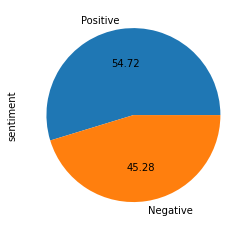

In [19]:
import matplotlib.pyplot as plt
df_1['sentiment'].value_counts().plot.pie(autopct='%.2f')

In [20]:
df_1["sentiment"].value_counts()
cleanup_nums = {"sentiment":     {"Negative":2, "Positive": 1,}}
df_1 = df_1.replace(cleanup_nums)
df_1.head(100)

,Review,Rating,review,review_token,review_stopwords,review_stemming,sentiment
0,"Great music service, the audio is high quality...",5,Great music service the audio is high quality ...,"[great, music, service, the, audio, is, high, ...","[great, music, service, audio, high, quality, ...","[great, music, servic, audio, high, qualiti, a...",1
1,Please ignore previous negative rating. This a...,5,Please ignore previous negative rating This ap...,"[please, ignore, previous, negative, rating, t...","[please, ignore, previous, negative, rating, a...","[pleas, ignor, previou, neg, rate, app, super,...",1
2,"This pop-up ""Get the best Spotify experience o...",4,This popup Get the best Spotify experience on ...,"[this, popup, get, the, best, spotify, experie...","[popup, get, best, spotify, experience, androi...","[popup, get, best, spotifi, experi, android, 1...",1
3,Really buggy and terrible to use as of recently,1,Really buggy and terrible to use as of recently,"[really, buggy, and, terrible, to, use, as, of...","[really, buggy, terrible, use, recently]","[realli, buggi, terribl, use, recent]",2
4,Dear Spotify why do I get songs that I didn't ...,1,Dear Spotify why do I get songs that I didnt p...,"[dear, spotify, why, do, i, get, songs, that, ...","[dear, spotify, get, songs, didnt, put, playli...","[dear, spotifi, get, song, didnt, put, playlis...",2
...,...,...,...,...,...,...,...
107,"This app worked well until v8.6.98.900, when t...",1,This app worked well until v8698900 when tryin...,"[this, app, worked, well, until, v8698900, whe...","[app, worked, well, v8698900, trying, install,...","[app, work, well, v8698900, tri, instal, newer...",2
108,"I use to love this app, but I soon hated it be...",1,I use to love this app but I soon hated it bec...,"[i, use, to, love, this, app, but, i, soon, ha...","[use, love, app, soon, hated, keeps, playing, ...","[use, love, app, soon, hate, keep, play, music...",2
109,Excellent music experience,5,Excellent music experience,"[excellent, music, experience]","[excellent, music, experience]","[excel, music, experi]",1
110,This is an amazing app I use it all the time a...,5,This is an amazing app I use it all the time a...,"[this, is, an, amazing, app, i, use, it, all, ...","[amazing, app, use, time, affordable, looking,...","[amaz, app, use, time, afford, look, app, lift...",1


In [21]:
FastText = df_1[['review_stemming','sentiment']]
FastText

,review_stemming,sentiment
0,"[great, music, servic, audio, high, qualiti, a...",1
1,"[pleas, ignor, previou, neg, rate, app, super,...",1
2,"[popup, get, best, spotifi, experi, android, 1...",1
3,"[realli, buggi, terribl, use, recent]",2
4,"[dear, spotifi, get, song, didnt, put, playlis...",2
...,...,...
61589,"[even, though, commun, lyric, featur, avail, u...",2
61590,"[use, sooo, good, back, download, free, versio...",2
61591,"[app, would, good, take, devic, start, comp, t...",2
61592,"[app, good, hard, navig, wont, let, play, song...",2


In [22]:
#w2v.to_csv("clear.csv", index = False) 

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from keras import layers
from keras.layers import Bidirectional
from keras.callbacks import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy import spatial
from gensim.utils import simple_preprocess
from keras.utils.vis_utils import plot_model
from keras.models import load_model

In [25]:
maxSeqLength=30
text = df_1['review_stemming'].tolist()

#tokenizer 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

#declaring
size_of_vocabulary  = len(tokenizer.word_index) + 1

#conversion to numerical
encoded_text = tokenizer.texts_to_sequences(text)
max_length = maxSeqLength
X = sequence.pad_sequences(encoded_text, maxlen=max_length, padding='post')
y = df_1['sentiment']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43766, 30) (43766,)
(10942, 30) (10942,)


# FastText

In [27]:
%%time
from gensim.models import KeyedVectors
ar_model = KeyedVectors.load_word2vec_format("cc.en.300.vec")

CPU times: total: 6min 14s
Wall time: 8min 57s


In [28]:
words_not_found = []
embedding_dim = 300  
embedding_matrix = np.zeros((size_of_vocabulary, embedding_dim))
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = ar_model.get_vector(word)
    except KeyError:
        embedding_vector = None
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)

# LSTM

In [29]:
UNITS = 64
lr = 0.001

In [30]:
model1=Sequential()
model1.add(Embedding(size_of_vocabulary,embedding_dim,weights=[embedding_matrix],input_length=max_length,trainable=False))

#Lstm layer
model1.add(LSTM(UNITS,return_sequences=True,dropout=0.5))

#Global Maxpooling
model1.add(GlobalMaxPooling1D())

#Dense Layer
model1.add(Dense(UNITS, activation='relu'))

#Output layer 3 class
model1.add(Dense(3,activation='softmax')) 

model1.compile(optimizer=Adam(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = ['acc']) 
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           6350100   
                                                                 
 lstm (LSTM)                 (None, 30, 64)            93440     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 6,447,895
Trainable params: 97,795
Non-trainable params: 6,350,100
_________________________________________

In [31]:
%%time
mc1 = ModelCheckpoint('best_model_f1.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  
history1 = model1.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2, verbose=1, callbacks=[mc1])

Epoch 1/50
545/548 [============================>.] - ETA: 0s - loss: 0.4426 - acc: 0.7948
Epoch 1: val_acc improved from -inf to 0.83013, saving model to best_model_f1.h5
548/548 [==============================] - 14s 23ms/step - loss: 0.4426 - acc: 0.7949 - val_loss: 0.3760 - val_acc: 0.8301
Epoch 2/50
547/548 [============================>.] - ETA: 0s - loss: 0.3669 - acc: 0.8416
Epoch 2: val_acc improved from 0.83013 to 0.85001, saving model to best_model_f1.h5
548/548 [==============================] - 12s 22ms/step - loss: 0.3669 - acc: 0.8416 - val_loss: 0.3440 - val_acc: 0.8500
Epoch 3/50
547/548 [============================>.] - ETA: 0s - loss: 0.3478 - acc: 0.8523
Epoch 3: val_acc improved from 0.85001 to 0.86246, saving model to best_model_f1.h5
548/548 [==============================] - 12s 22ms/step - loss: 0.3478 - acc: 0.8523 - val_loss: 0.3276 - val_acc: 0.8625
Epoch 4/50
546/548 [============================>.] - ETA: 0s - loss: 0.3343 - acc: 0.8608
Epoch 4: val_acc i

In [32]:
# Training Accuracy
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
print('Train: %.4f' % (train_acc))

Train: 0.9463


In [33]:
with open('history_f1.json', 'w') as f:
    json.dump(history1.history, f)

In [34]:
hist_f1 = json.load(open('history_f1.json'))
print(hist_f1.keys())

loss_f1 = hist_f1['loss']
val_loss_f1 = hist_f1['val_loss']
acc_f1 = hist_f1['acc']
val_acc_f1 = hist_f1['val_acc']

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


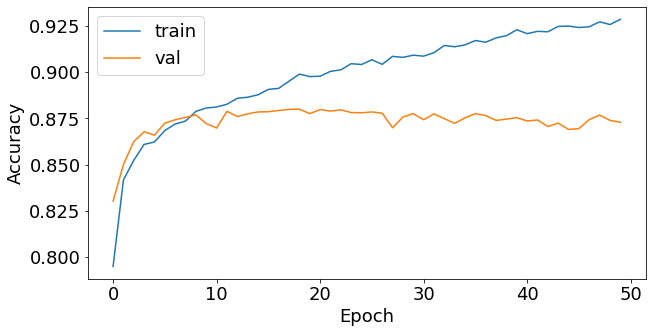

<Figure size 432x288 with 0 Axes>

In [35]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(hist_f1['acc'])
plt.plot(hist_f1['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()
fig.savefig('FastText-1 Acc.png', dpi=300)

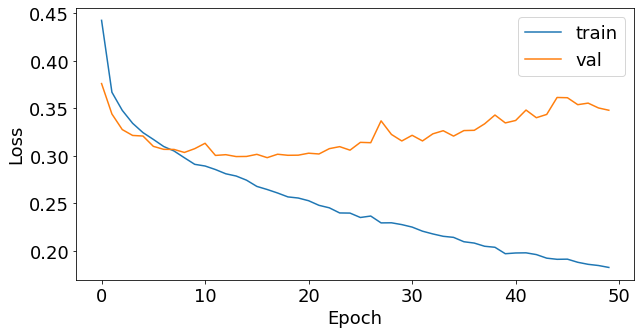

<Figure size 432x288 with 0 Axes>

In [36]:
fig = plt.figure(figsize=(10,5))
plt.rcParams["font.size"] = "18"
plt.plot(loss_f1, label='train')
plt.plot(val_loss_f1, label='val')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
fig.savefig('FastText-1 Loss.png', dpi=300)

In [37]:
# Validation Accuracy
print("Validation Accuracy: %.4f" % max(val_acc_f1))

Validation Accuracy: 0.8799


In [38]:
# Testing Accuracy
%time
y_pred = model1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

CPU times: total: 0 ns
Wall time: 0 ns
342/342 [==============================] - 2s 5ms/step


In [39]:
cm = tf.math.confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
print("------")
print('Classification Report')
target_names = ['positive', 'negative']
print(classification_report(y_test, y_pred, target_names=target_names ))

Confusion Matrix
tf.Tensor(
[[   0    0    0]
 [   0 5241  747]
 [   0  639 4315]], shape=(3, 3), dtype=int32)
------
Classification Report
              precision    recall  f1-score   support

    positive       0.89      0.88      0.88      5988
    negative       0.85      0.87      0.86      4954

    accuracy                           0.87     10942
   macro avg       0.87      0.87      0.87     10942
weighted avg       0.87      0.87      0.87     10942

